<a href="https://colab.research.google.com/github/MrBokl/np2022/blob/main/LR4/LR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №4

### студента групи Анд-31

### Майданик  Андрій

### Варіант №7

# Завдання №1

###Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи(0, 5, 7).

###Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
( train_data ,  train_labels ),  ( test_data ,  test_labels )  =  fashion_mnist . load_data ()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_data = train_data[np.where(np.in1d(train_labels, [6, 9, 3]))]
train_labels = train_labels[np.where(np.in1d(train_labels, [6, 9, 3]))]
test_data = test_data[np.where(np.in1d(test_labels, [6, 9, 3]))]
test_labels = test_labels[np.where(np.in1d(test_labels, [6, 9, 3]))]
class_names_1 = [class_names[i] for i in [6, 9, 3]]

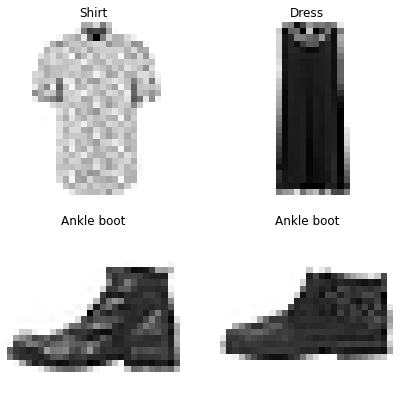

In [6]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [7]:
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
563/563 [==============================] - 2s 2ms/step - loss: 2.1352 - accuracy: 0.3316 - val_loss: 1.6066 - val_accuracy: 0.3340
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 1.3924 - accuracy: 0.3638 - val_loss: 1.2994 - val_accuracy: 0.3340
Epoch 3/10
563/563 [==============================] - 1s 2ms/step - loss: 1.0074 - accuracy: 0.5055 - val_loss: 0.8750 - val_accuracy: 0.5957
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.6053 - val_loss: 0.5634 - val_accuracy: 0.8303
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.8728 - val_loss: 0.3943 - val_accuracy: 0.8737
Epoch 6/10
563/563 [==============================] - 2s 3ms/step - loss: 0.3373 - accuracy: 0.8961 - val_loss: 0.3476 - val_accuracy: 0.8750
Epoch 7/10
563/563 [==============================] - 2s 3ms/step - loss: 0.2943 - accuracy: 0.9002 - val_loss: 0.3006 - val_accuracy: 0.8940
Epoch 

In [8]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


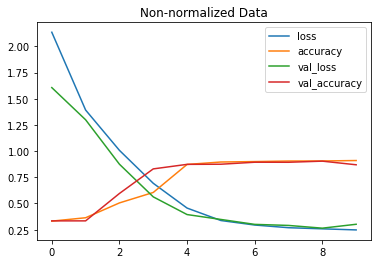

In [9]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

In [10]:
#Confusion matrix
predicted_labels1 = model_11.predict(test_data)
predicted_labels1 = predicted_labels1.argmax(axis=1)
print(f"Model 1, not normalized data:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels1)}")

Model 1, not normalized data:
 [[874 124   2]
 [254 738   8]
 [  0   3 997]]


In [11]:
#Normalize data
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data.min(), train_data.max()

(0.0, 1.0)

In [12]:
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
563/563 [==============================] - 2s 2ms/step - loss: 0.5877 - accuracy: 0.8412 - val_loss: 0.1624 - val_accuracy: 0.9467
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1240 - accuracy: 0.9556 - val_loss: 0.1518 - val_accuracy: 0.9443
Epoch 3/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1102 - accuracy: 0.9601 - val_loss: 0.1414 - val_accuracy: 0.9513
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9613 - val_loss: 0.1362 - val_accuracy: 0.9497
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1006 - accuracy: 0.9626 - val_loss: 0.1355 - val_accuracy: 0.9540
Epoch 6/10
563/563 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9637 - val_loss: 0.1323 - val_accuracy: 0.9527
Epoch 7/10
563/563 [==============================] - 1s 3ms/step - loss: 0.0959 - accuracy: 0.9637 - val_loss: 0.1375 - val_accuracy: 0.9540
Epoch 

In [13]:
predicted_labels2 = model_12.predict(test_data)
predicted_labels2 = predicted_labels2.argmax(axis=1)
print(f"Model 2, normalized data:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels2)}")

Model 2, normalized data:
 [[945  55   0]
 [ 90 910   0]
 [  0   1 999]]


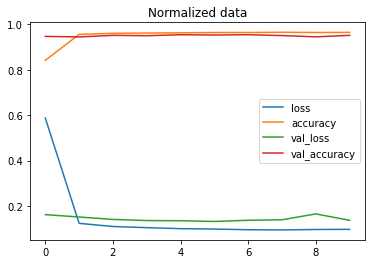

In [14]:
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [15]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
563/563 [==============================] - 2s 2ms/step - loss: 0.4186 - accuracy: 0.8355 - val_loss: 0.1673 - val_accuracy: 0.9403 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.1300 - accuracy: 0.9547 - val_loss: 0.1606 - val_accuracy: 0.9433 - lr: 0.0011
Epoch 3/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1151 - accuracy: 0.9586 - val_loss: 0.1459 - val_accuracy: 0.9493 - lr: 0.0013
Epoch 4/40
563/563 [==============================] - 2s 4ms/step - loss: 0.1102 - accuracy: 0.9597 - val_loss: 0.1365 - val_accuracy: 0.9507 - lr: 0.0014
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9618 - val_loss: 0.1464 - val_accuracy: 0.9490 - lr: 0.0016
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.1037 - accuracy: 0.9616 - val_loss: 0.1331 - val_accuracy: 0.9523 - lr: 0.0018
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - lo

# Завдання №2

Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.

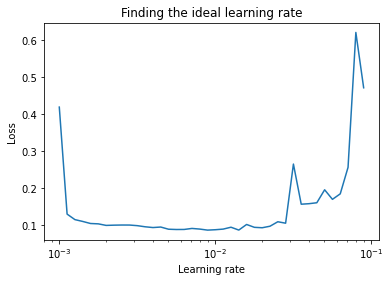

In [16]:
#learning rate
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [17]:
l_rate = min(find_lr_history.history["loss"])

In [18]:
tf.random.set_seed(42)

# Create the model
model4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                 metrics=["accuracy"])

# Fit the model
history = model4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
563/563 [==============================] - 2s 3ms/step - loss: 0.2881 - accuracy: 0.8991 - val_loss: 0.1354 - val_accuracy: 0.9487
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.1071 - accuracy: 0.9607 - val_loss: 0.1212 - val_accuracy: 0.9550
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0957 - accuracy: 0.9644 - val_loss: 0.1335 - val_accuracy: 0.9543
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9660 - val_loss: 0.1108 - val_accuracy: 0.9593
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9678 - val_loss: 0.1135 - val_accuracy: 0.9607
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9692 - val_loss: 0.1236 - val_accuracy: 0.9600
Epoch 7/20
563/563 [==============================] - 3s 5ms/step - loss: 0.0770 - accuracy: 0.9712 - val_loss: 0.1277 - val_accuracy: 0.9577
Epoch 

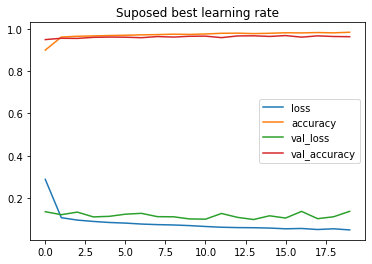

In [19]:
history4_df = pd.DataFrame(history.history)
history4_df.plot(title='Suposed best learning rate')

In [20]:
predicted_labels4 = model4.predict(test_data)
predicted_labels4 = predicted_labels4.argmax(axis=1)
print(f"Model 4, supposed best rate:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels4)}")

Model 4, supposed best rate:
 [[917  83   0]
 [ 27 973   0]
 [  0   3 997]]


Forecast check


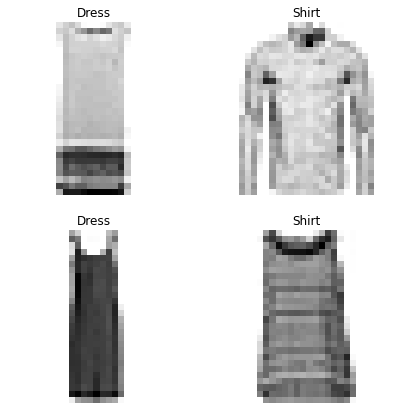

In [21]:
print("Forecast check")
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(test_data)))
  plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[predicted_labels4[rand_index]])
  plt.axis(False)

# Висновок

В ході лабораторної роботи було розглянуто класифікацію за допомогою нейронної мережі. Для побудови нейронної мережі було використано пакет tensorflow. Також будували крафік для знаходження оптимальної к-ть епох. Будувал і confusion matrix для перевірки прогнозу. Для досягнення хороших прогнозів ми спочатку зробили звичайну нейронну мережу з двома прихованими шарами. Потім ми зробили теж саме, але нормалізували наші дані і наша точність підвищилась. Далі я добавив ще один шар та декілька нейронів у інші шари і таким чином ми отримали гарні результати.